#### WRF output cross section from <a href="https://wrf-python.readthedocs.io/en/latest/plot.html#cross-example">wrf-python examples</a> (Adapted by Lauren Getker)
This code utilizes wrf-python's CoordPair and vertcross codes to create vertical cross sections from WRF output files.
Adapted from wrf-python documentation

In [39]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from wrf import to_np, getvar, CoordPair, vertcross, latlon_coords
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

#Name of file to create cross section from
filename = "/home/getker/wrf_hugo/wrf_cp_test/wrfout_d01_1989-09-22_03:00:00"

#Acceleration of gravity (constant) for converting to geopotential height
g = 9.8

#Latitude of first cross section point
lat1 = 30.0

#Longitude of first cross section point
lon1 = -80.0

# Latitude of second cross section point
lat2 = 31.0

#Longitude of second cross section point
lon2 = -78.8

data = Dataset(filename, "r", format="NETCDF4")

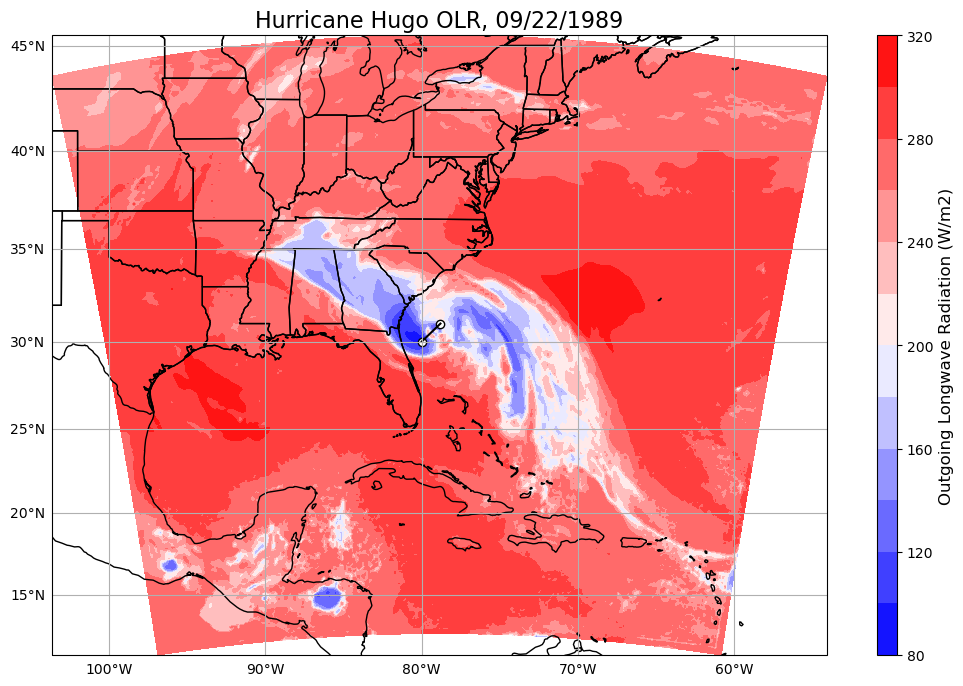

In [40]:
"""
Plot Hugo OLR near landfall to get an idea of horizontal placement, and overlay the coordinates of our cross section.
"""
olr = getvar(data, "OLR")
lats, lons = latlon_coords(olr)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude = 0))
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
cs = ax.contourf(lons, lats, olr, cmap = "bwr", levels = 10, transform=ccrs.PlateCarree())
ax.scatter(lon1, lat1, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
ax.scatter(lon2, lat2, color = 'white', transform=ccrs.PlateCarree(), edgecolors = 'black')
ax.plot([lon1,lon2], [lat1, lat2], color = 'black', transform=ccrs.PlateCarree())
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs, cax = cax)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels=False   # suppress top grid labels
gl.right_labels=False # suppress right grid labels
ax.set_title("Hurricane Hugo OLR, 09/22/1989", fontsize = 16)
cbar.set_label("Outgoing Longwave Radiation (W/m2)", fontsize = 12)
fig.savefig('hugo_olr_cross_section_19890922T0300.png',
            bbox_inches='tight',transparent=False,facecolor='white')


In [41]:
"""
Open the wrfout file and get geopotential height data to use as our vertical 
"""
ph = getvar(data, "PH") # get geopotential perturbation 
phb = getvar(data, "PHB") # get geopotential base state 
z = ph + phb #Add base state and perturbation to get geopotential height
z = (z / 9.8) / 1000 #Convert value to km

z_notop = z[0:49]

w =  getvar(data, 'W')
#ice = getvar(data, 'QICE')
cloud = getvar(data, 'QCLOUD')
vapor = getvar(data, 'QVAPOR')
graup = getvar(data, 'QGRAUP')
snow = getvar(data, 'QSNOW')
rain = getvar(data, 'QRAIN')
t = getvar(data, 'tc')
h_diabatic = getvar(data, 'H_DIABATIC')

# Create the start point and end point for the cross section
start_point = CoordPair(lat=30.15, lon=-80.97)
end_point = CoordPair(lat=32.96, lon=-78.21)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
w_cross = vertcross(w, z, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

rain_cross = vertcross(rain, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)
t_cross = vertcross(t, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)
h_cross = vertcross(h_diabatic, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)
graup_cross = vertcross(graup, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

snow_cross = vertcross(snow, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)
"""
#ice_cross = vertcross(ice, z_notop, wrfin=data, start_point=start_point,
#                       end_point=end_point, latlon=True, meta=True)

cloud_cross = vertcross(cloud, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

vapor_cross = vertcross(vapor, z_notop, wrfin=data, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

"""

<xarray.DataArray 'temp' (bottom_top: 49, south_north: 310, west_east: 343)>
array([[[ 26.056763 ,  26.023651 ,  25.992432 , ...,  26.214203 ,
          26.24179  ,  26.030457 ],
        [ 26.122314 ,  26.124664 ,  26.114746 , ...,  26.202332 ,
          26.217072 ,  26.144867 ],
        [ 26.210175 ,  26.210052 ,  26.20868  , ...,  26.179504 ,
          26.188934 ,  26.165344 ],
        ...,
        [  9.751221 ,  10.744812 ,  10.942688 , ...,  18.66983  ,
          18.74527  ,  18.880981 ],
        [  9.471466 ,   8.806854 ,  10.901825 , ...,  18.490143 ,
          18.553284 ,  18.674652 ],
        [ 10.239227 ,   9.327789 ,   9.652832 , ...,  18.345276 ,
          18.39566  ,  18.448639 ]],

       [[ 25.559845 ,  25.53769  ,  25.529602 , ...,  25.567657 ,
          25.578217 ,  25.360199 ],
        [ 25.598663 ,  25.58377  ,  25.578827 , ...,  25.62085  ,
          25.625702 ,  25.541138 ],
        [ 25.644287 ,  25.644989 ,  25.648407 , ...,  25.64441  ,
          25.649445 ,  25.

'\n#ice_cross = vertcross(ice, z_notop, wrfin=data, start_point=start_point,\n#                       end_point=end_point, latlon=True, meta=True)\n\ncloud_cross = vertcross(cloud, z_notop, wrfin=data, start_point=start_point,\n                       end_point=end_point, latlon=True, meta=True)\n\nvapor_cross = vertcross(vapor, z_notop, wrfin=data, start_point=start_point,\n                       end_point=end_point, latlon=True, meta=True)\n\n'

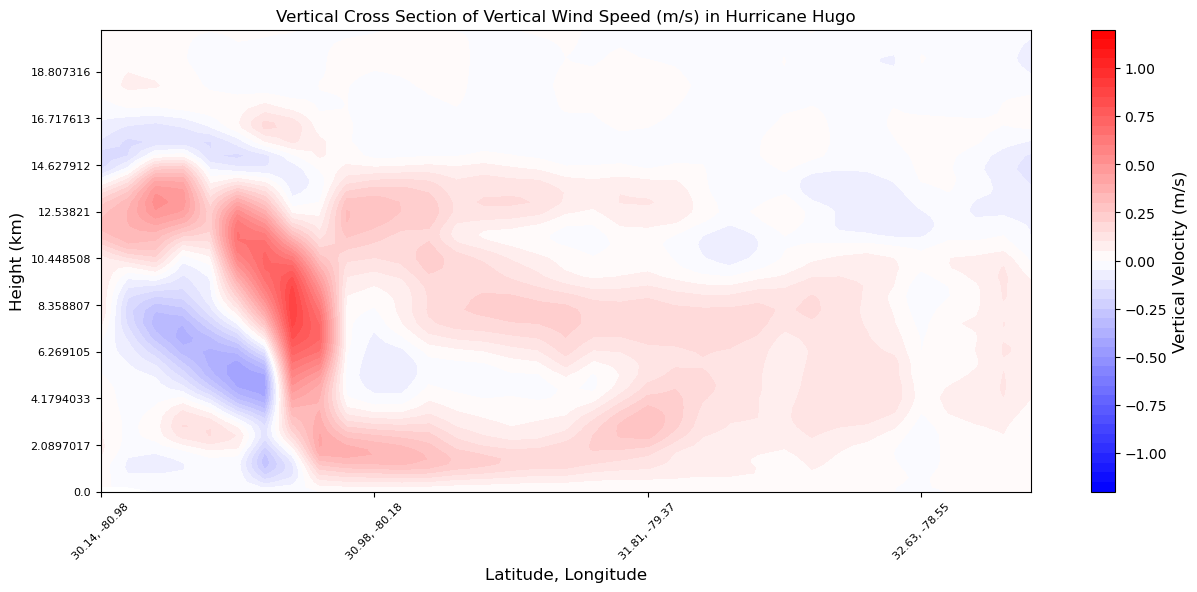

In [42]:
"""
Now, plot our cross section. You may need to edit parts of this cell to match your desired variable.
You can also get additional variables and contour them.
"""
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contours -- make sure to modify levels here
wspd_contours = ax.contourf(to_np(w_cross), cmap="bwr", levels = np.arange(-1.2, 1.25, .05))

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(w_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::10])
ax.set_xticklabels(x_labels[::10], rotation=45, fontsize=8)


# Set the y-ticks to be height.
vert_vals = to_np(w_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::10])
ax.set_yticklabels(vert_vals[::10], fontsize=8)

#plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (km)", fontsize=12)

plt.title("Vertical Cross Section of Vertical Wind Speed (m/s) in Hurricane Hugo")
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(wspd_contours, cax = cax)
cbar.set_label("Vertical Velocity (m/s)", fontsize = 12)
plt.show()
fig.savefig('hugo_w_cross_section_19890922T0300.png',
            bbox_inches='tight',transparent=False,facecolor='white')

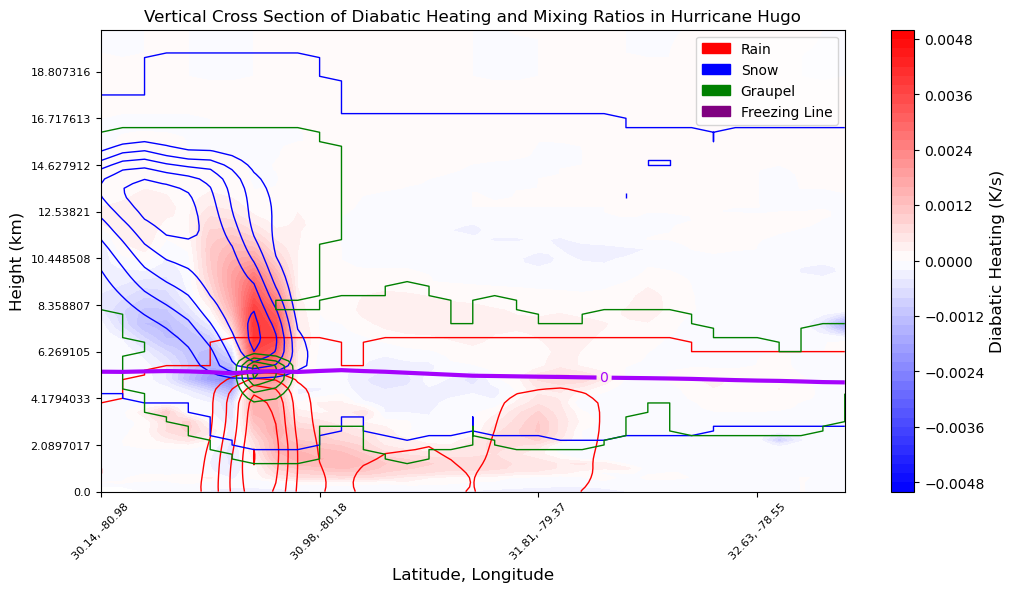

In [44]:
"""
Now, plot our cross section. You may need to edit parts of this cell to match your desired variable.
You can also get additional variables and contour them.
"""
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Contours -- make sure to modify levels here
#wspd_contours = ax.contourf(to_np(wspd_cross), cmap="bwr", levels = np.arange(-2, 2.1, .1))
l1 = ax.contour(to_np(rain_cross), colors = ('red',), levels = 5, linewidths = 1)
l2 = ax.contour(to_np(snow_cross), colors = ('blue',), levels = 5, linewidths = 1)
l3 = ax.contour(to_np(graup_cross), colors = ('green',), levels = 5, linewidths = 1)
l4 = ax.contour(to_np(t_cross), colors = ('#a503fc',), levels = np.arange(0,1, 1), linewidths = 3)
#ax.clabel(l1,fmt = "%.1E")#, levels = np.arange(0, .0008, .0002))
#ax.clabel(l2,fmt = "%.1E")#, levels = np.arange(0, .0032, .0008))
#ax.clabel(l3,fmt = "%.1E")
ax.clabel(l4)
cs = ax.contourf(to_np(h_cross), cmap = 'bwr', levels = np.arange(-.005, .0052, .0002))
"""
#ax.contour(to_np(ice_cross), colors = ('b',), levels = 10)
ax.contour(to_np(graup_cross), colors = ('g',), levels = 10)
ax.contour(to_np(snow_cross), colors = ('b',), levels = 10)
#ax.contour(to_np(vapor_cross), colors = ('#b603fc',))
# ax.contour(to_np(cloud_cross), colors = ('#fc8403',))
#plt.colorbar(wspd_contours, ax=ax)
"""

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(w_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::10])
ax.set_xticklabels(x_labels[::10], rotation=45, fontsize=8)


# Set the y-ticks to be height.
vert_vals = to_np(w_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::10])
ax.set_yticklabels(vert_vals[::10], fontsize=8)

#plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (km)", fontsize=12)

#colorbar
#cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
cbar = plt.colorbar(cs)
cbar.set_label("Diabatic Heating (K/s)", fontsize = 12)


red_patch = mpatches.Patch(color='red', label='Rain')
blue_patch = mpatches.Patch(color='blue', label='Snow')
green_patch = mpatches.Patch(color='green', label='Graupel')
purple_patch = mpatches.Patch(color='purple', label='Freezing Line')
ax.legend(handles=[red_patch, blue_patch, green_patch, purple_patch])
plt.title("Vertical Cross Section of Diabatic Heating and Mixing Ratios in Hurricane Hugo")
plt.show()
fig.savefig('hugo_q_cross_section_19890922T0300.png',
            bbox_inches='tight',transparent=False,facecolor='white')